In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
df=pd.read_parquet(r'C:\Users\91706\Data Analytics Practice\databases\python\crime data\Crime_Data_from_2020_to_Present.parquet')

- Frequency of MO Codes

In [130]:
df['Mocodes'] = df['Mocodes'].astype(str).str.split()
df_exploded = df.explode('Mocodes', ignore_index=True)
plot29=df_exploded['Mocodes'].value_counts().head(10).reset_index(name='count')
plot29

,Mocodes,count
0,1822,342174
1,0344,299045
2,0913,151893
3,Unknown,151619
4,0329,130016
5,0416,121110
6,1300,97386
7,0400,74024
8,2000,73728
9,1402,58615


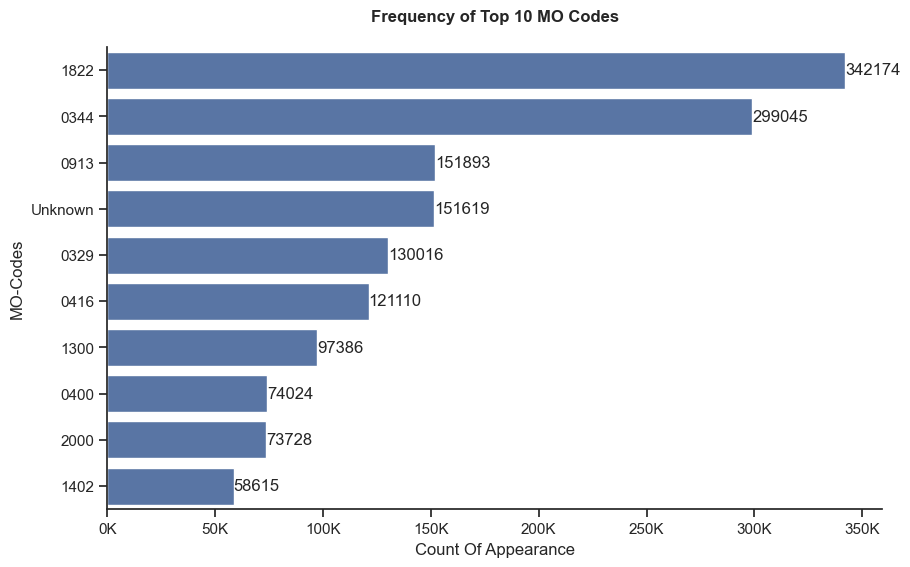

In [131]:
plt.figure(figsize=(10,6))
sns.set_theme(style='ticks')
ax=sns.barplot(data=plot29,x='count',y='Mocodes')
plt.title('Frequency of Top 10 MO Codes\n',weight='bold')
plt.ylabel('MO-Codes')
plt.xlabel('Count Of Appearance')
for i in ax.containers:
    ax.bar_label(i)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'{int(x/1000)}K'))
sns.despine()
plt.show()

- Common Patterns Across Crime Categories

In [132]:
plot30=df_exploded.groupby('Vict Sex')['Mocodes'].value_counts().groupby(level=0).head(10).reset_index(name='count')
plot30

,Vict Sex,Mocodes,count
0,Female,1822,121126
1,Female,0344,109242
2,Female,0913,94494
3,Female,2000,57284
4,Female,0416,57240
5,Female,0329,47689
6,Female,1300,39665
7,Female,1814,37124
8,Female,0400,36114
9,Female,0444,23091


In [133]:
bins=0,12,18,30,45,60,float('inf')
labels=['kids (0-11)','tennager (12-17)','young (18-29)','adult (30-44)','mid-age (44-59)','old (>60)']
df_exploded['age-group']=pd.cut(df_exploded['Vict Age'],bins=bins,labels=labels,right=False,include_lowest=True)

In [134]:
plot31=df_exploded.groupby('age-group',observed=True)['Mocodes'].value_counts().groupby(level=0).head().reset_index(name='count')
plot31

C:\Users\91706\AppData\Local\Temp\ipykernel_18420\2607242133.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot31=df_exploded.groupby('age-group',observed=True)['Mocodes'].value_counts().groupby(level=0).head().reset_index(name='count')


,age-group,Mocodes,count
0,kids (0-11),Unknown,146054
1,kids (0-11),1822,53999
2,kids (0-11),0344,44295
3,kids (0-11),0325,31507
4,kids (0-11),0329,26878
5,tennager (12-17),1259,9298
6,tennager (12-17),0913,8004
7,tennager (12-17),0416,5811
8,tennager (12-17),1822,5600
9,tennager (12-17),1251,5413


In [135]:
top5=df_exploded['Vict Descent'].value_counts().sort_values(ascending=False).head().index
filt_df=df_exploded[df_exploded['Vict Descent'].isin(top5)]
plot32=filt_df.groupby('Vict Descent',observed=True)['Mocodes'].value_counts().groupby(level=0).head().reset_index(name='count')
plot32

,Vict Descent,Mocodes,count
0,Black,1822,53119
1,Black,0913,41171
2,Black,0344,36634
3,Black,0416,27309
4,Black,2000,20234
5,Hispanic/Latin/Mexican,1822,110050
6,Hispanic/Latin/Mexican,0344,80647
7,Hispanic/Latin/Mexican,0913,74959
8,Hispanic/Latin/Mexican,0416,62192
9,Hispanic/Latin/Mexican,0329,40906


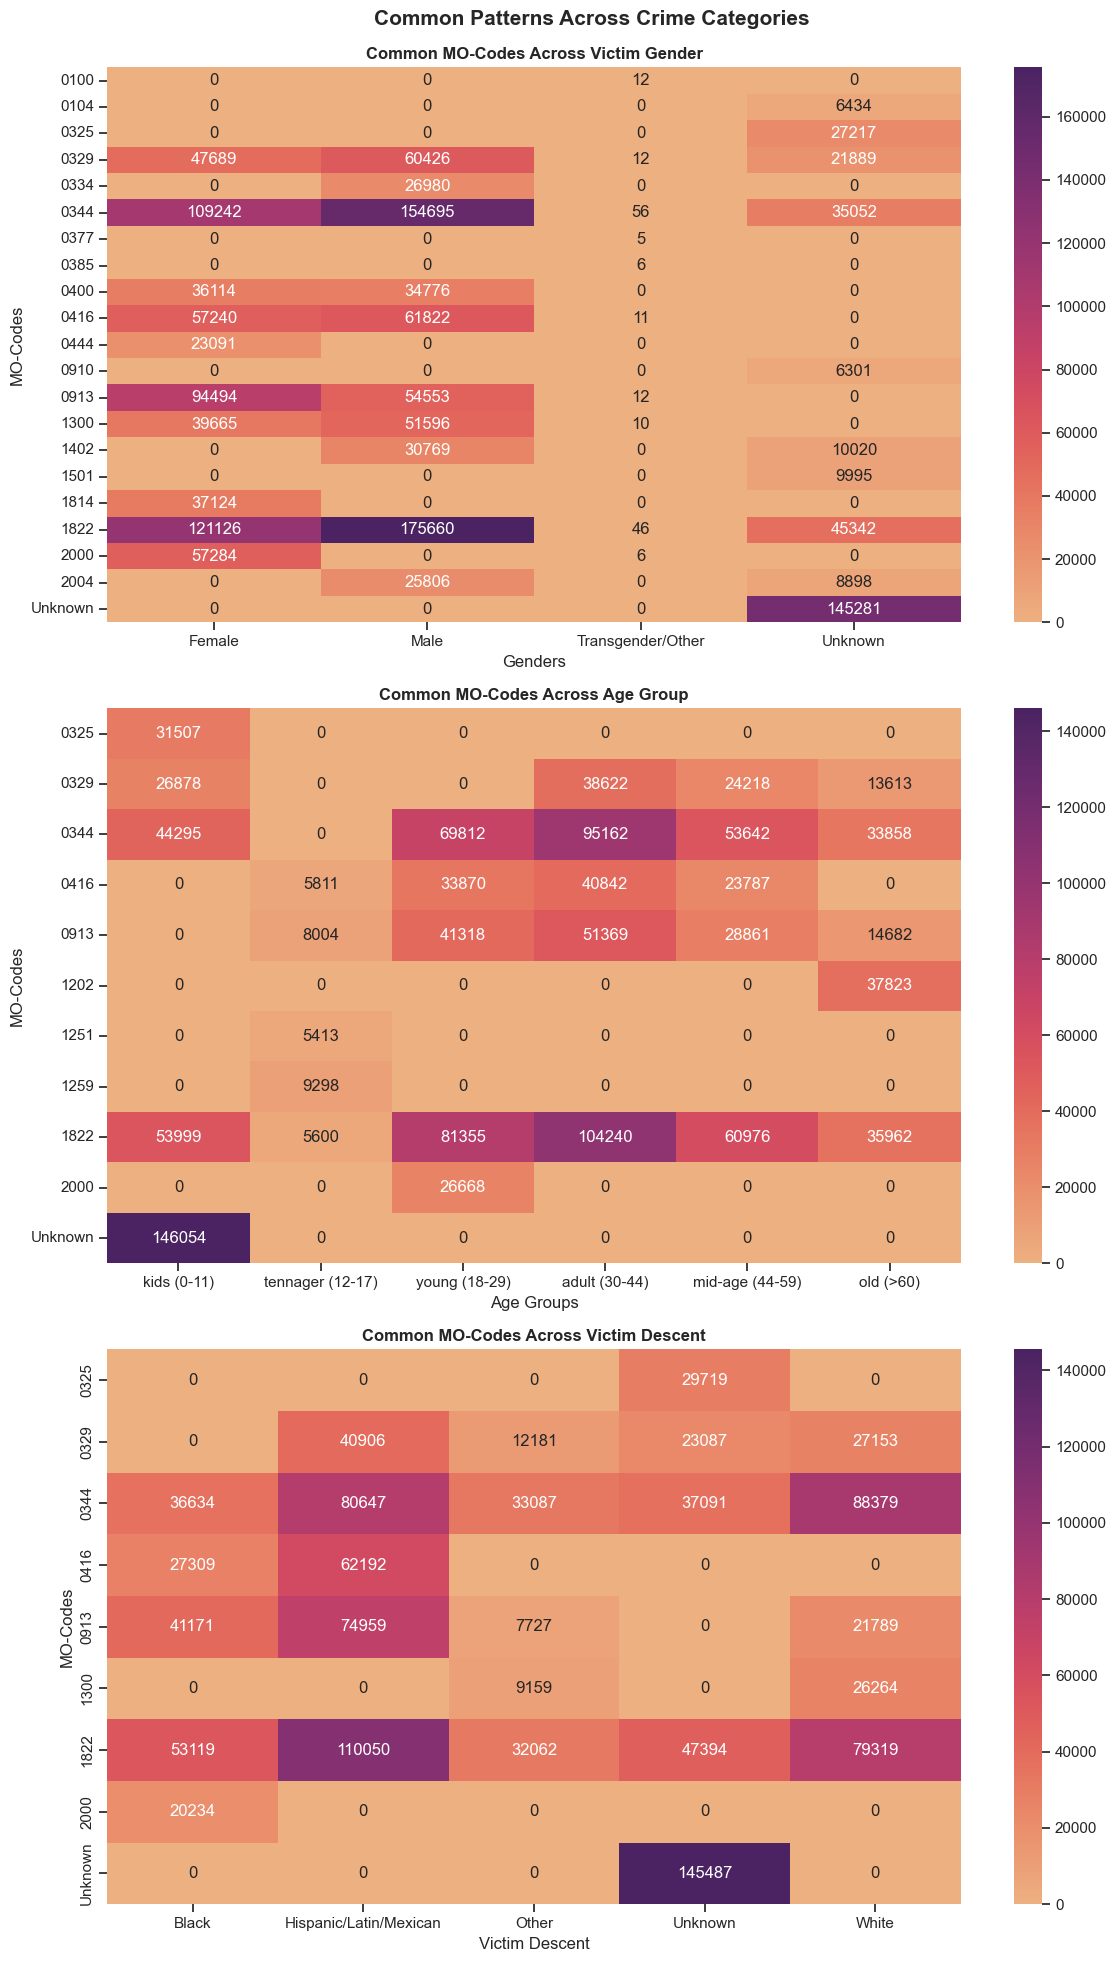

In [136]:
fig,ax=plt.subplots(3,1,figsize=(12,20))

heatmap101=plot30.pivot_table(
    index='Mocodes',observed=True,
    columns='Vict Sex',
    values='count',
    fill_value=0,
)
ax[0]=sns.heatmap(heatmap101,cmap='flare',annot=True,fmt='0.0f',ax=ax[0])
ax[0].set_ylabel('MO-Codes')
ax[0].set_xlabel('Genders')
ax[0].set_title('Common MO-Codes Across Victim Gender',weight='bold')


heatmap102=plot31.pivot_table(
    index='Mocodes',observed=True,
    columns='age-group',
    values='count',
    fill_value=0
)
ax[1]=sns.heatmap(heatmap102,cmap='flare',annot=True,fmt='0.0f',ax=ax[1])
ax[1].set_ylabel('MO-Codes')
ax[1].set_xlabel('Age Groups')
ax[1].set_title('Common MO-Codes Across Age Group',weight='bold')


heatmap103=plot32.pivot_table(
    index='Mocodes',observed=True,
    columns='Vict Descent',
    values='count',
    fill_value=0
)
ax[2]=sns.heatmap(heatmap103,cmap='flare',annot=True,fmt='0.0f',ax=ax[2])
ax[2].set_ylabel('MO-Codes')
ax[2].set_xlabel('Victim Descent')
ax[2].set_title('Common MO-Codes Across Victim Descent',weight='bold')
plt.suptitle('Common Patterns Across Crime Categories\n',weight='bold',fontsize=15)
plt.tight_layout()
plt.show()

- Area vs Common MO Analysis

In [137]:
df_exploded.head(2)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,occ_year,occ_month,occ_date,occ_day,age-group
0,211507896,2021-04-11,2020-11-07,08:45:00,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,0377,31,Male,Hispanic/Latin/Mexican,501.0,SINGLE FAMILY DWELLING,0.0,Unknown,IC,Invest Cont,354.0,7800 BEEMAN AV,34.2124,-118.4092,2020,Nov,7,Sat,adult (30-44)
1,201516622,2020-10-21,2020-10-18,18:45:00,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0416,32,Male,Hispanic/Latin/Mexican,102.0,SIDEWALK,200.0,KNIFE WITH BLADE 6INCHES OR LESS,IC,Invest Cont,230.0,ATOLL AV,34.1993,-118.4203,2020,Oct,18,Sun,adult (30-44)


In [138]:
plot33 = (
    df_exploded
    .groupby(['AREA NAME', 'Mocodes'], observed=True)
    .size()
    .reset_index(name='count')
    .sort_values(['AREA NAME', 'count'], ascending=[True, False])
    .groupby('AREA NAME')
    .head(5)
)
plot32

,Vict Descent,Mocodes,count
0,Black,1822,53119
1,Black,0913,41171
2,Black,0344,36634
3,Black,0416,27309
4,Black,2000,20234
5,Hispanic/Latin/Mexican,1822,110050
6,Hispanic/Latin/Mexican,0344,80647
7,Hispanic/Latin/Mexican,0913,74959
8,Hispanic/Latin/Mexican,0416,62192
9,Hispanic/Latin/Mexican,0329,40906


Text(0.5, 1.0, 'Area vs Common MO Analysis\n')

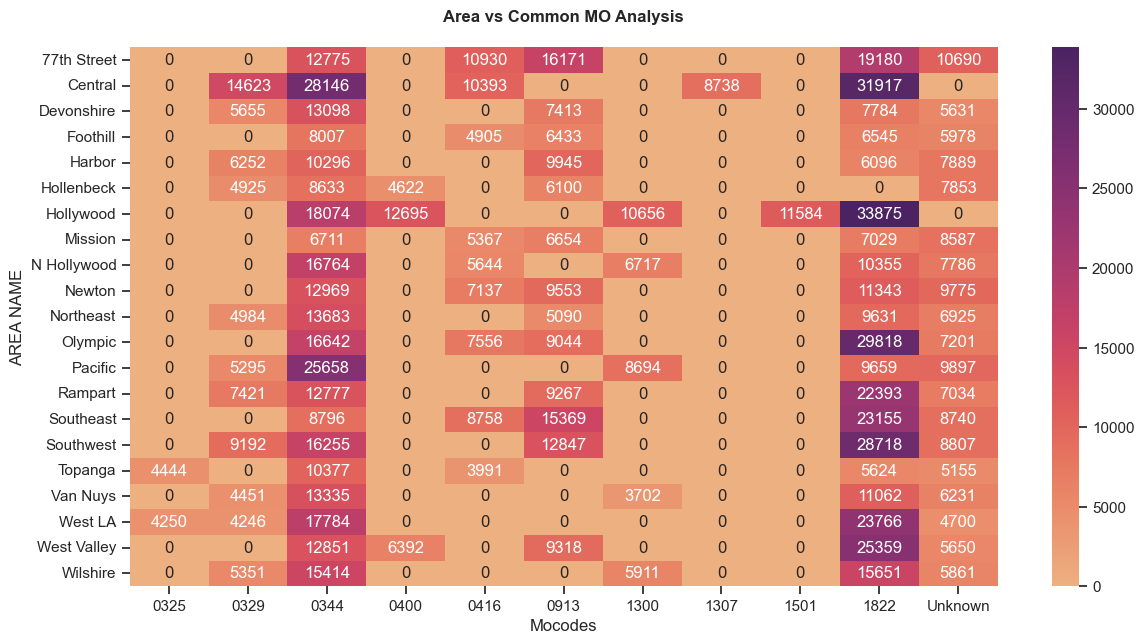

In [139]:
heatmap104=plot33.pivot_table(
    index='AREA NAME',
    columns='Mocodes',
    values='count',
    fill_value=0
)
plt.figure(figsize=(14,7))
ax=sns.heatmap(heatmap104,cmap='flare',annot=True,fmt='.0f')
plt.title('Area vs Common MO Analysis\n',weight='bold')

- Percentage of Crimes Involving Weapons

In [141]:
df['Weapon Used Cd']=df['Weapon Used Cd'].astype(int)

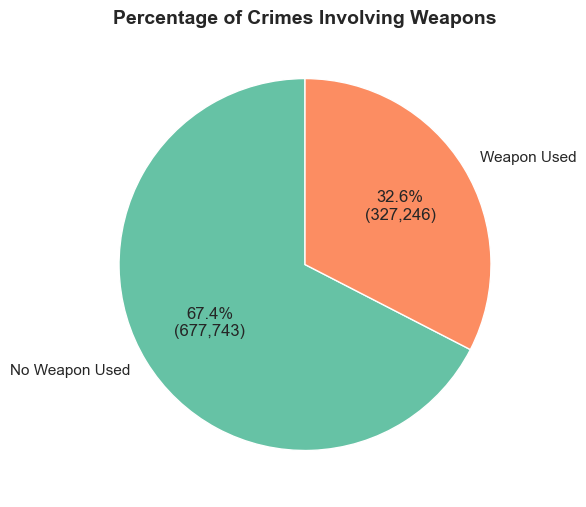

In [154]:
no_weapon = df[df['Weapon Used Cd'] == 0].shape[0]
total = df.shape[0]
weapon_used = total - no_weapon

labels = ['No Weapon Used', 'Weapon Used']
sizes = [no_weapon, weapon_used]
colors = sns.color_palette('Set2')

plt.figure(figsize=(6,6))
plt.pie(
    sizes,
    labels=labels,
    autopct=lambda p: f'{p:.1f}%\n({int(p * sum(sizes) / 100):,})',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white'}
)
plt.title('Percentage of Crimes Involving Weapons', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


- Top Weapons Used by Crime Type

In [174]:
top5a=df['Crm Cd Desc'].value_counts().sort_values(ascending=False).head(10).index
top5aa=df[df['Crm Cd Desc'].isin(top5a)]

In [177]:

plot34=(top5aa.groupby(['Crm Cd Desc','Weapon Used Cd'] ,observed=True)
        .size()
        .reset_index(name='count')
        .sort_values(['Crm Cd Desc','Weapon Used Cd'],ascending=[True,False])
        .groupby('Crm Cd Desc')
        .head()
        )
plot34

,Crm Cd Desc,Weapon Used Cd,count
76,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",516,31
75,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",515,5
74,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",514,50
73,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",513,155
72,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",512,2768
121,BATTERY - SIMPLE ASSAULT,516,6
120,BATTERY - SIMPLE ASSAULT,515,10
119,BATTERY - SIMPLE ASSAULT,513,3
118,BATTERY - SIMPLE ASSAULT,512,33
117,BATTERY - SIMPLE ASSAULT,511,181


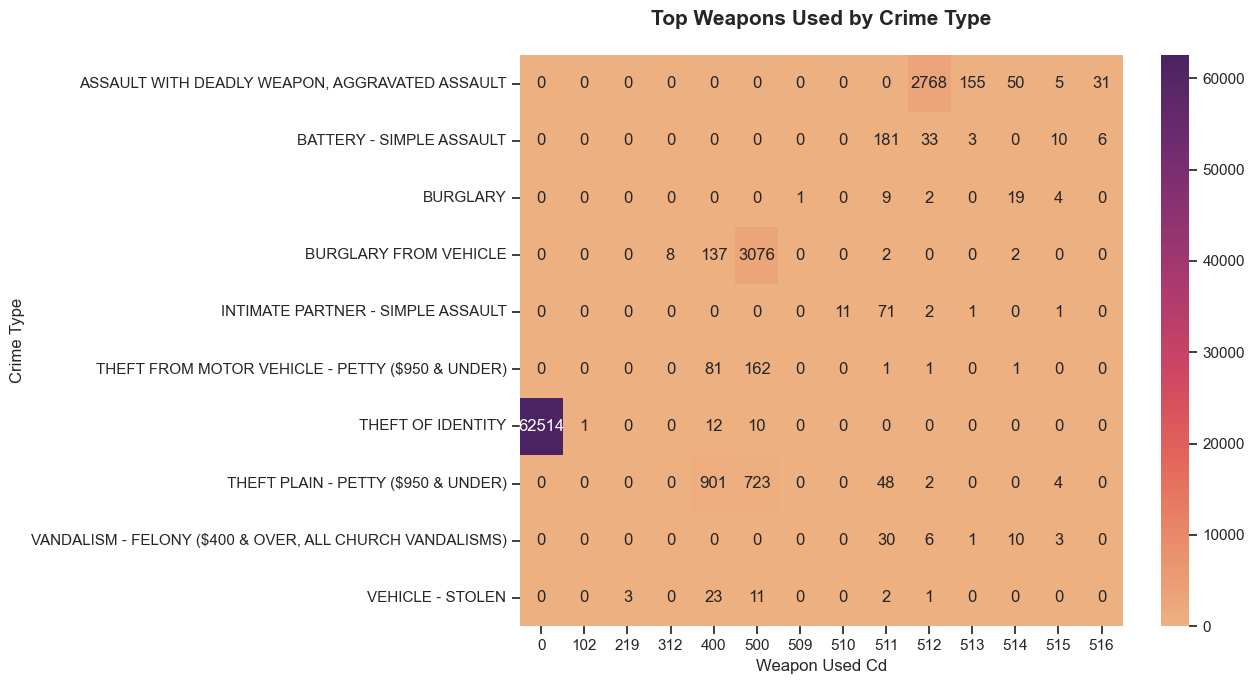

In [186]:
heatmap105=plot34.pivot_table(
    index='Crm Cd Desc',
    columns='Weapon Used Cd',
    values='count',
    fill_value=0
)
plt.figure(figsize=(13,7))
ax=sns.heatmap(heatmap105,cmap='flare',annot=True,fmt='.0f')
plt.ylabel('Crime Type')
plt.title('Top Weapons Used by Crime Type\n',weight='bold',fontsize=15)
plt.tight_layout()
plt.show()

- Yearly Trend of Weapon-Related Crimes

In [195]:
plot35=(df.groupby(['occ_year','Weapon Used Cd'],observed=True)
        .size().
        reset_index(name='count')
        .sort_values(['occ_year','count'],ascending=[True,False])
        .groupby('occ_year').head()
        )
plot35

,occ_year,Weapon Used Cd,count
0,2020,0,126868
60,2020,400,39530
61,2020,500,7899
72,2020,511,5221
2,2020,102,3957
78,2021,0,135936
135,2021,400,39495
136,2021,500,7310
147,2021,511,5278
80,2021,102,4940


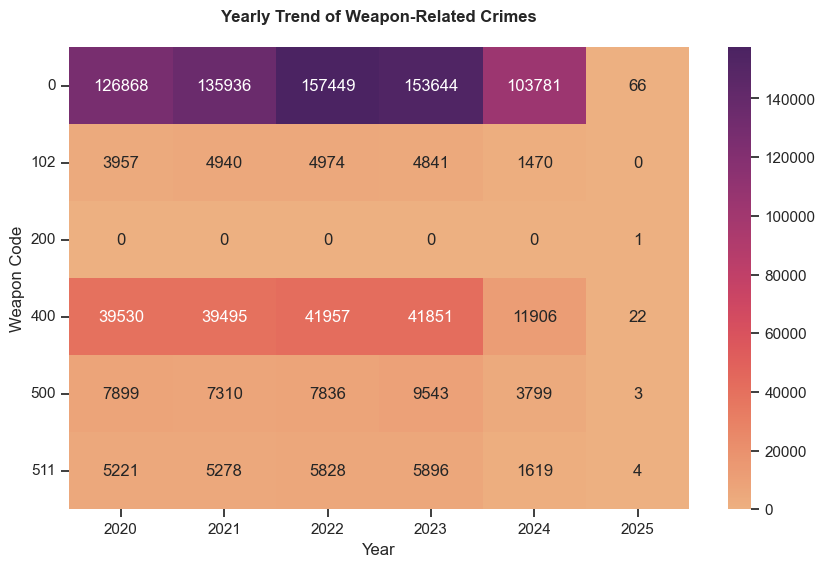

In [201]:
heatmap106=plot35.pivot_table(
    index='Weapon Used Cd',
    columns='occ_year',
    values='count',
    fill_value=0
)
plt.figure(figsize=(10,6))
ax=sns.heatmap(heatmap106,cmap='flare',annot=True,fmt='.0f')
plt.xlabel('Year')
plt.ylabel('Weapon Code')
plt.title('Yearly Trend of Weapon-Related Crimes\n',weight='bold')
ax.tick_params(rotation=0)

- Crime Status Distribution

In [205]:
plot36=df.groupby('Status Desc').size().sort_values(ascending=True).reset_index(name='count')
plot36

,Status Desc,count
0,UNK,7
1,Juv Other,1879
2,Juv Arrest,3286
3,Adult Arrest,87155
4,Adult Other,109802
5,Invest Cont,802862


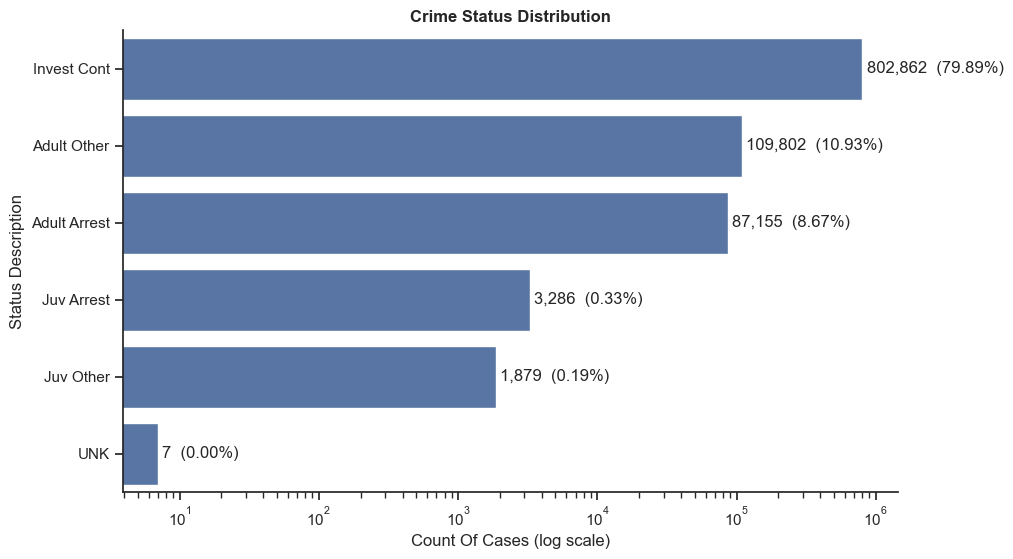

In [221]:
plt.figure(figsize=(10,6))
ax=sns.barplot(data=plot36, x='count', y='Status Desc')
ax.invert_yaxis()
plt.xscale('log')

total = plot36['count'].sum()
for i in ax.containers:
    labels = [f"{v.get_width():,.0f}  ({v.get_width()/total*100:.2f}%)" for v in i]
    ax.bar_label(i, labels=labels, padding=3)

plt.xlabel('Count Of Cases (log scale)')
plt.ylabel('Status Description')
plt.title('Crime Status Distribution',weight='bold')
sns.despine()
plt.show()

- Cleared vs Pending Cases by Crime Type

In [232]:
top10=df['Crm Cd Desc'].value_counts().sort_values(ascending=False).head(10).index
top10aa=df[df['Crm Cd Desc'].isin(top10)]

plot37=(top10aa.groupby(['Crm Cd Desc','Status Desc'])
    .size().reset_index(name='count')
    .sort_values(['Crm Cd Desc','count'],ascending=[True,False])
    .groupby('Crm Cd Desc')
    .head()
    )
plot37

,Crm Cd Desc,Status Desc,count
2,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",Invest Cont,32261
0,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",Adult Arrest,11686
1,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",Adult Other,8928
3,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",Juv Arrest,567
4,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",Juv Other,83
7,BATTERY - SIMPLE ASSAULT,Invest Cont,49785
6,BATTERY - SIMPLE ASSAULT,Adult Other,19434
5,BATTERY - SIMPLE ASSAULT,Adult Arrest,4576
9,BATTERY - SIMPLE ASSAULT,Juv Other,668
8,BATTERY - SIMPLE ASSAULT,Juv Arrest,376


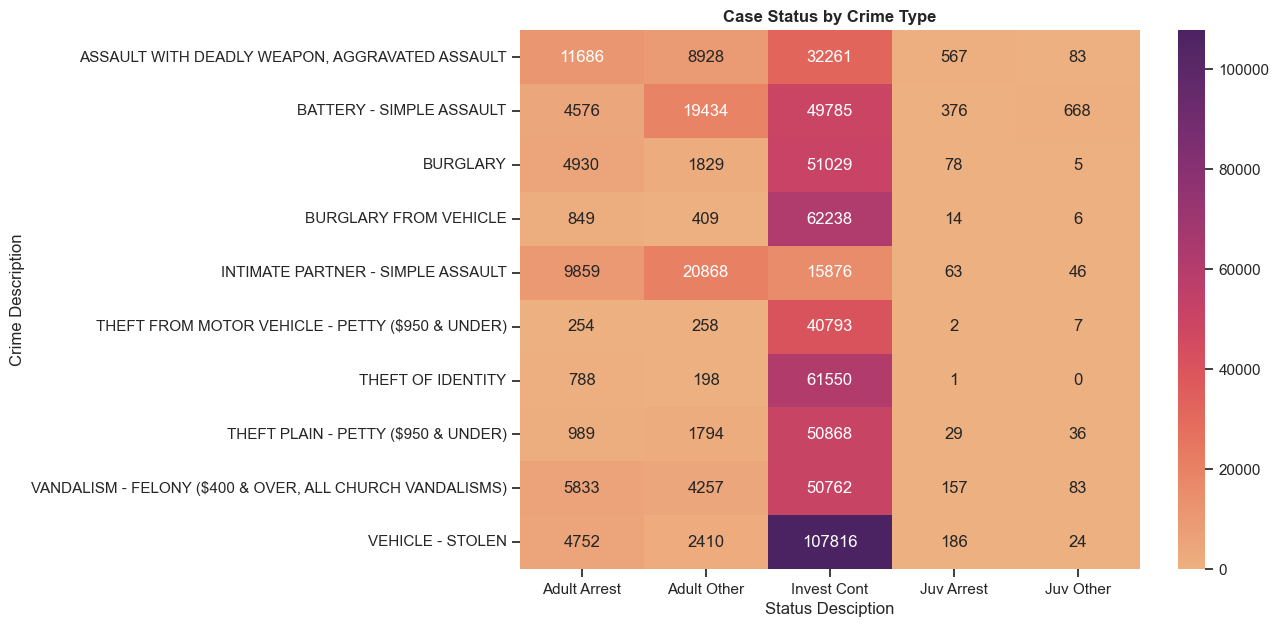

In [241]:
heatmap107=plot37.pivot_table(
    index='Crm Cd Desc',
    columns='Status Desc',
    values='count',
    fill_value=0
)
plt.figure(figsize=(10,7))
sns.heatmap(heatmap107,cmap='flare',annot=True,fmt='.0f')
plt.title('Case Status by Crime Type',weight='bold')
plt.xlabel('Status Desciption')
plt.ylabel('Crime Description')

plt.show()

- Relationship Between Weapon Usage and Case Status

In [254]:
plot38=(
    df.groupby(['Status Desc', 'Weapon Used Cd'], observed=True)
      .size()
      .reset_index(name='count')
      .sort_values(['Status Desc', 'count'], ascending=[True, False])
      .groupby('Status Desc')
      .head(5)    
)
plot38

,Status Desc,Weapon Used Cd,count
0,Adult Arrest,0,33092
59,Adult Arrest,400,25957
60,Adult Arrest,500,4747
71,Adult Arrest,511,4487
2,Adult Arrest,102,3371
134,Adult Other,400,51465
77,Adult Other,0,31363
146,Adult Other,511,6691
135,Adult Other,500,5653
79,Adult Other,102,2214


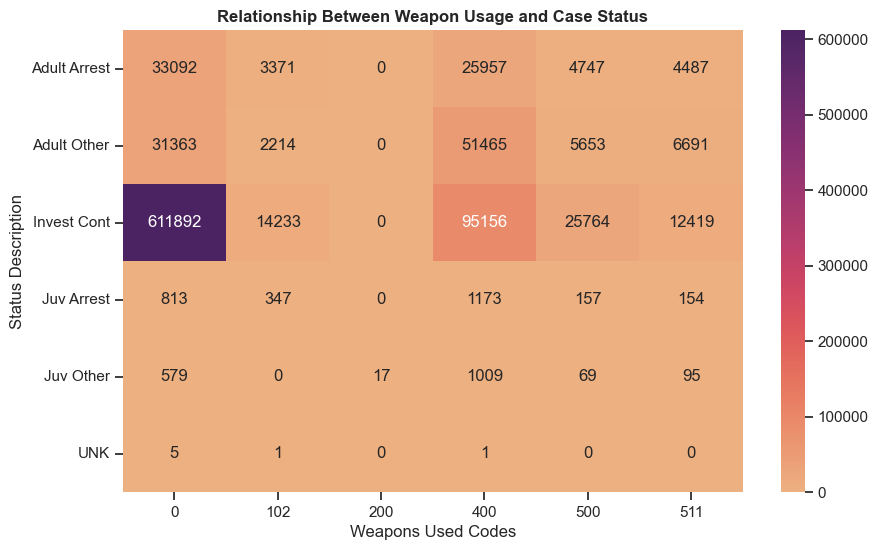

In [258]:
heatmap108=plot38.pivot_table(
    index='Status Desc',
    columns='Weapon Used Cd',
    values='count',
    fill_value=0
)
plt.figure(figsize=(10,6))
sns.heatmap(heatmap108,cmap='flare',annot=True,fmt='.0f')
plt.ylabel('Status Description')
plt.xlabel('Weapons Used Codes')
plt.title('Relationship Between Weapon Usage and Case Status',weight='bold')
plt.show()